## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.934473  0.422570  0.074585  1.447041  0.685963  1.616451
1  1.041363 -0.342614  1.541516 -0.717531 -0.582624  0.391576
2  1.047293 -0.760550  0.515338  0.876738 -0.765547  0.197040
3  1.600407  0.595114 -0.858753  0.180589  0.642267  0.873394
4 -1.039047 -1.532249  0.767420  0.218630 -0.993819 -1.392604


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0036772	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.9922798	total: 69.5ms	remaining: 34.7s
2:	learn: 0.9815130	total: 70ms	remaining: 23.3s
3:	learn: 0.9705259	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9602133	total: 71.2ms	remaining: 14.2s
5:	learn: 0.9504194	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9390900	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9294505	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9217250	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9134202	total: 73.9ms	remaining: 7.31s
10:	learn: 0.9056664	total: 74.4ms	remaining: 6.68s
11:	learn: 0.8954594	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8847395	total: 75.3ms	remaining: 5.72s
13:	learn: 0.8758257	total: 75.9ms	remaining: 5.34s
14:	learn: 0.8678974	total: 76.4ms	remaining: 5.02s
15:	learn: 0.8598994	total: 77ms	remaining: 4.73s
16:	learn: 0.8515896	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8444824	total: 77.9ms	remaining: 4.25s
18:	learn: 0.8364981	total: 78.4ms	remaining: 4.

85:	learn: 0.4546094	total: 110ms	remaining: 1.17s
86:	learn: 0.4506752	total: 111ms	remaining: 1.16s
87:	learn: 0.4469644	total: 111ms	remaining: 1.15s
88:	learn: 0.4435379	total: 112ms	remaining: 1.14s
89:	learn: 0.4400933	total: 112ms	remaining: 1.13s
90:	learn: 0.4369365	total: 113ms	remaining: 1.13s
91:	learn: 0.4336096	total: 113ms	remaining: 1.12s
92:	learn: 0.4298123	total: 114ms	remaining: 1.11s
93:	learn: 0.4258327	total: 114ms	remaining: 1.1s
94:	learn: 0.4225871	total: 115ms	remaining: 1.1s
95:	learn: 0.4189231	total: 116ms	remaining: 1.09s
96:	learn: 0.4162140	total: 116ms	remaining: 1.08s
97:	learn: 0.4127572	total: 117ms	remaining: 1.08s
98:	learn: 0.4089378	total: 117ms	remaining: 1.07s
99:	learn: 0.4058373	total: 118ms	remaining: 1.06s
100:	learn: 0.4031894	total: 118ms	remaining: 1.05s
101:	learn: 0.4004240	total: 119ms	remaining: 1.04s
102:	learn: 0.3975279	total: 119ms	remaining: 1.04s
103:	learn: 0.3950454	total: 120ms	remaining: 1.03s
104:	learn: 0.3920392	total: 

245:	learn: 0.1509323	total: 187ms	remaining: 575ms
246:	learn: 0.1496869	total: 188ms	remaining: 573ms
247:	learn: 0.1487208	total: 189ms	remaining: 572ms
248:	learn: 0.1476239	total: 189ms	remaining: 570ms
249:	learn: 0.1468883	total: 189ms	remaining: 568ms
250:	learn: 0.1461744	total: 190ms	remaining: 567ms
251:	learn: 0.1455007	total: 190ms	remaining: 565ms
252:	learn: 0.1445439	total: 191ms	remaining: 563ms
253:	learn: 0.1436660	total: 191ms	remaining: 562ms
254:	learn: 0.1429944	total: 192ms	remaining: 560ms
255:	learn: 0.1422246	total: 192ms	remaining: 559ms
256:	learn: 0.1415656	total: 193ms	remaining: 557ms
257:	learn: 0.1408673	total: 193ms	remaining: 555ms
258:	learn: 0.1397391	total: 194ms	remaining: 554ms
259:	learn: 0.1389371	total: 194ms	remaining: 552ms
260:	learn: 0.1379399	total: 195ms	remaining: 551ms
261:	learn: 0.1372508	total: 195ms	remaining: 549ms
262:	learn: 0.1365272	total: 195ms	remaining: 547ms
263:	learn: 0.1356856	total: 196ms	remaining: 546ms
264:	learn: 

469:	learn: 0.0485595	total: 294ms	remaining: 332ms
470:	learn: 0.0484269	total: 295ms	remaining: 331ms
471:	learn: 0.0480896	total: 295ms	remaining: 330ms
472:	learn: 0.0477581	total: 296ms	remaining: 329ms
473:	learn: 0.0474921	total: 296ms	remaining: 329ms
474:	learn: 0.0473261	total: 297ms	remaining: 328ms
475:	learn: 0.0472615	total: 297ms	remaining: 327ms
476:	learn: 0.0470984	total: 297ms	remaining: 326ms
477:	learn: 0.0469619	total: 298ms	remaining: 325ms
478:	learn: 0.0467636	total: 298ms	remaining: 324ms
479:	learn: 0.0465689	total: 299ms	remaining: 324ms
480:	learn: 0.0463015	total: 299ms	remaining: 323ms
481:	learn: 0.0460485	total: 300ms	remaining: 322ms
482:	learn: 0.0459871	total: 300ms	remaining: 321ms
483:	learn: 0.0459264	total: 300ms	remaining: 320ms
484:	learn: 0.0456390	total: 301ms	remaining: 319ms
485:	learn: 0.0455794	total: 301ms	remaining: 319ms
486:	learn: 0.0452973	total: 302ms	remaining: 318ms
487:	learn: 0.0451753	total: 302ms	remaining: 317ms
488:	learn: 

632:	learn: 0.0250536	total: 371ms	remaining: 215ms
633:	learn: 0.0249417	total: 371ms	remaining: 214ms
634:	learn: 0.0248320	total: 372ms	remaining: 214ms
635:	learn: 0.0247240	total: 372ms	remaining: 213ms
636:	learn: 0.0246743	total: 373ms	remaining: 212ms
637:	learn: 0.0246255	total: 373ms	remaining: 212ms
638:	learn: 0.0244925	total: 374ms	remaining: 211ms
639:	learn: 0.0243815	total: 374ms	remaining: 210ms
640:	learn: 0.0242760	total: 374ms	remaining: 210ms
641:	learn: 0.0242290	total: 375ms	remaining: 209ms
642:	learn: 0.0241828	total: 376ms	remaining: 208ms
643:	learn: 0.0240744	total: 376ms	remaining: 208ms
644:	learn: 0.0239199	total: 376ms	remaining: 207ms
645:	learn: 0.0238168	total: 377ms	remaining: 207ms
646:	learn: 0.0237721	total: 377ms	remaining: 206ms
647:	learn: 0.0237283	total: 378ms	remaining: 205ms
648:	learn: 0.0236234	total: 378ms	remaining: 205ms
649:	learn: 0.0234766	total: 379ms	remaining: 204ms
650:	learn: 0.0234339	total: 379ms	remaining: 203ms
651:	learn: 

855:	learn: 0.0118509	total: 478ms	remaining: 80.4ms
856:	learn: 0.0117944	total: 478ms	remaining: 79.8ms
857:	learn: 0.0117520	total: 479ms	remaining: 79.2ms
858:	learn: 0.0116975	total: 479ms	remaining: 78.6ms
859:	learn: 0.0116427	total: 480ms	remaining: 78.1ms
860:	learn: 0.0115887	total: 480ms	remaining: 77.5ms
861:	learn: 0.0115396	total: 481ms	remaining: 76.9ms
862:	learn: 0.0114868	total: 481ms	remaining: 76.3ms
863:	learn: 0.0114462	total: 481ms	remaining: 75.8ms
864:	learn: 0.0113973	total: 482ms	remaining: 75.2ms
865:	learn: 0.0113445	total: 482ms	remaining: 74.7ms
866:	learn: 0.0112933	total: 483ms	remaining: 74.1ms
867:	learn: 0.0112467	total: 483ms	remaining: 73.5ms
868:	learn: 0.0111965	total: 484ms	remaining: 72.9ms
869:	learn: 0.0111510	total: 484ms	remaining: 72.3ms
870:	learn: 0.0110971	total: 484ms	remaining: 71.7ms
871:	learn: 0.0110485	total: 485ms	remaining: 71.2ms
872:	learn: 0.0109962	total: 485ms	remaining: 70.6ms
873:	learn: 0.0109449	total: 486ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

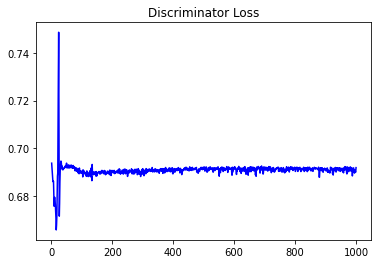

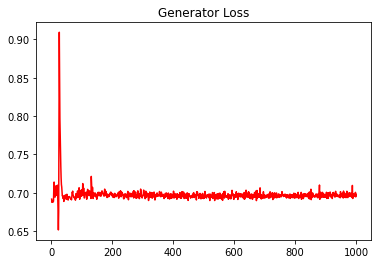

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09010237646042044


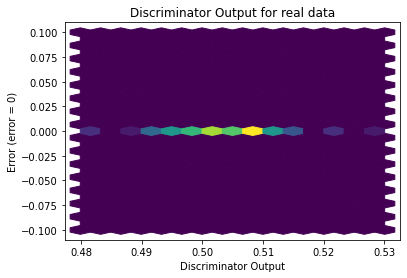

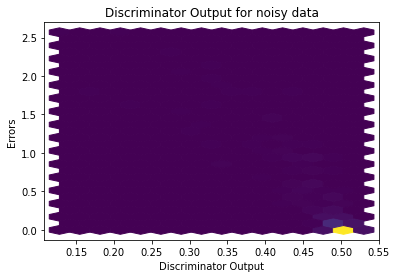

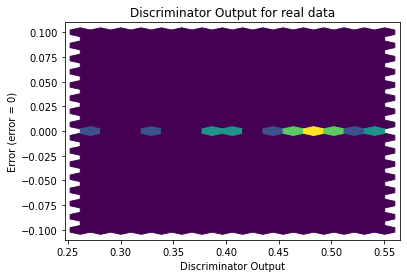

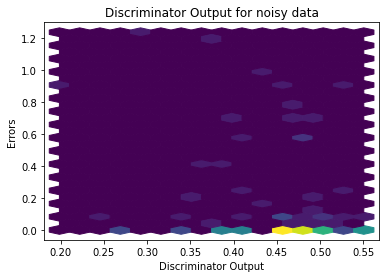

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


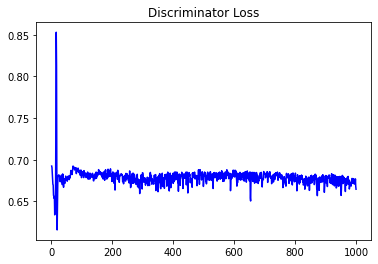

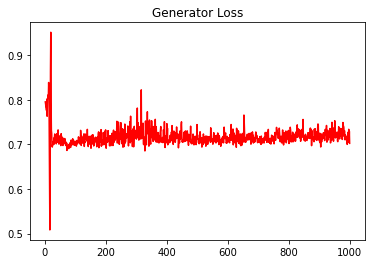

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04705548495602312


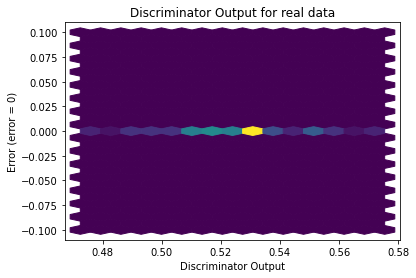

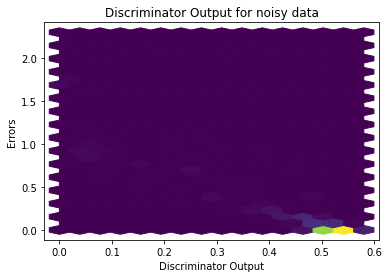

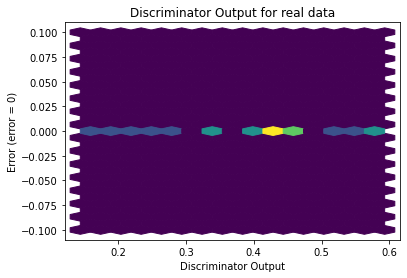

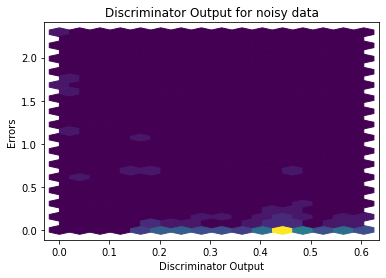

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1755]], requires_grad=True)
